<a href="https://colab.research.google.com/github/Zalutskii/GBEdu/blob/master/PyTorch/Lesson_03/lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_california_housing 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam
import torch.utils.data as Data

import matplotlib.pyplot as plt
import seaborn as sns

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X_train: np.ndarray, Y_train: np.ndarray):
      from sklearn.preprocessing import StandardScaler
      scale = StandardScaler()

      X_train_s = scale.fit_transform(X_train)

      self.train_xt = torch.from_numpy(X_train_s.astype(np.float32))
      self.train_yt = torch.from_numpy(Y_train.astype(np.float32))
    
    def __len__(self):
        return len(self.train_yt)
   
    def __getitem__(self, idx):
        return self.train_xt[idx], self.train_yt[idx] 

In [142]:
housedata = fetch_california_housing()
X_train, X_test, Y_train, Y_test = train_test_split(housedata.data, housedata.target, test_size=0.25, random_state=13)

train_data = CustomDataset(X_train, Y_train)
test_data = CustomDataset(X_test, Y_test)

In [143]:
train_loader = Data.DataLoader(dataset = train_data, batch_size=64, shuffle = True, num_workers=0)
test_loader = Data.DataLoader(dataset = test_data, batch_size=64, shuffle = True, num_workers=0)

In [144]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.hl_1 = nn.Linear(in_features=8, out_features=1, bias=True)
        
#        self.hl_2 = nn.Sequential(nn.Linear(in_features=100, out_features=100, bias=True),
#                                  nn.Dropout(0.2),
#                                  nn.ReLU())
#        
#        self.hl_3 = nn.Sequential(nn.Linear(in_features=100, out_features=60, bias=True),
#                                  nn.Dropout(0.2),
#                                  nn.ReLU()
#                                  )
        
#        self.hl_4 = nn.Sequential(nn.Linear(in_features=8, out_features=8),
#                                  nn.Dropout(0.2),
#                                  nn.ReLU()
#                                  )
        
#        self.predict = nn.Sequential(nn.Linear(in_features=8, out_features=1, bias=True),
#                                        nn.ReLU())
        
    def forward(self, x):
        output = self.hl_1(x)
#        x = self.hl_2(x)
#        x = self.hl_3(x)
#        x = self.hl_4(x)
 #       output = self.predict(x)
        return output[:, 0]


In [145]:
def train_test(model, optimizer, loss_func):
    train_loss_all = []
    test_loss_all = []

    for epoch in range(30):
        train_loss = 0
        train_num = 0
        for step, (b_x, b_y) in enumerate(train_loader):
            output = model(b_x)
            loss = loss_func(output, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * b_x.size(0)
            train_num += b_x.size(0)
        train_loss_all.append(train_loss / train_num)

        test_loss = 0
        test_num = 0
        for step, (b_x, b_y) in enumerate(test_loader):
            output = model(b_x)
            loss = loss_func(output, b_y)
            test_loss += loss.item() * b_x.size(0)
            test_num += b_x.size(0)
        test_loss_all.append(test_loss / test_num)

        print(f'Epoch [{epoch + 1}]. train_loss: {train_loss}. test_loss: {test_loss}')

    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_all, "bo-", label="Train loss", c='green')
    plt.plot(test_loss_all, "bo-", label="Test loss", c='red')
    plt.legend()
    plt.grid()
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.show()

Epoch [1]. train_loss: 22039.49048089981. test_loss: 3327.564341068268
Epoch [2]. train_loss: 9197.312925100327. test_loss: 2935.796003341675
Epoch [3]. train_loss: 8655.427460193634. test_loss: 2829.7027435302734
Epoch [4]. train_loss: 8377.726769685745. test_loss: 2732.6044669151306
Epoch [5]. train_loss: 8303.510678768158. test_loss: 2793.9218180179596
Epoch [6]. train_loss: 8347.843911647797. test_loss: 2743.7781920433044
Epoch [7]. train_loss: 8200.678686618805. test_loss: 2698.2658438682556
Epoch [8]. train_loss: 8315.338236808777. test_loss: 2750.4246339797974
Epoch [9]. train_loss: 8239.845455884933. test_loss: 2757.488138437271
Epoch [10]. train_loss: 8132.314773797989. test_loss: 2693.768007516861
Epoch [11]. train_loss: 8335.144112825394. test_loss: 2790.520646095276
Epoch [12]. train_loss: 8087.293433666229. test_loss: 2764.481925010681
Epoch [13]. train_loss: 8227.128726959229. test_loss: 2810.810996055603
Epoch [14]. train_loss: 8142.627669811249. test_loss: 3119.45368289

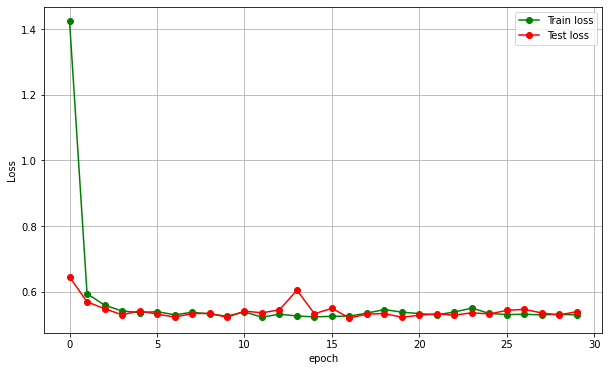

In [150]:
model = MLPRegression()
train_test(model, torch.optim.SGD(model.parameters(), lr=0.01), nn.MSELoss())

Epoch [1]. train_loss: 18203.850148439407. test_loss: 3115.5707874298096
Epoch [2]. train_loss: 8900.1509039402. test_loss: 2818.649960756302
Epoch [3]. train_loss: 8647.435519695282. test_loss: 2810.2640447616577
Epoch [4]. train_loss: 8341.411729335785. test_loss: 2774.826606273651
Epoch [5]. train_loss: 8297.344557285309. test_loss: 2945.3389863967896
Epoch [6]. train_loss: 8305.130275726318. test_loss: 2708.626887321472
Epoch [7]. train_loss: 8260.176895856857. test_loss: 2974.8558411598206
Epoch [8]. train_loss: 8385.37649011612. test_loss: 2786.6476373672485
Epoch [9]. train_loss: 8326.975071430206. test_loss: 2981.9168088436127
Epoch [10]. train_loss: 8664.756009101868. test_loss: 2807.6155314445496
Epoch [11]. train_loss: 8189.490538597107. test_loss: 2710.8100414276123
Epoch [12]. train_loss: 8226.651528835297. test_loss: 2790.950737953186
Epoch [13]. train_loss: 8198.16284251213. test_loss: 2756.161081790924
Epoch [14]. train_loss: 8220.2538356781. test_loss: 2716.69326591491

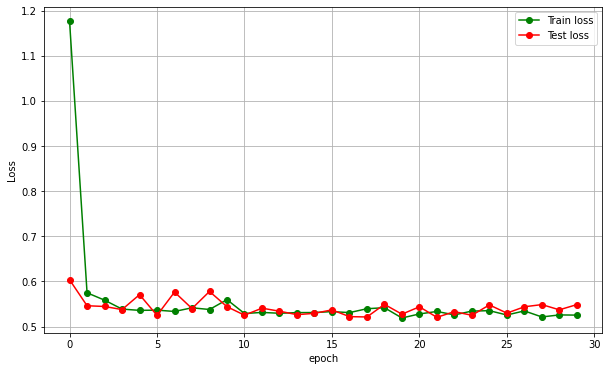

In [153]:
model = MLPRegression()
train_test(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9), nn.MSELoss())

Epoch [1]. train_loss: 32814.27388191223. test_loss: 7632.944591522217
Epoch [2]. train_loss: 18897.13643360138. test_loss: 5291.5528354644775
Epoch [3]. train_loss: 14042.895613193512. test_loss: 4195.1859674453735
Epoch [4]. train_loss: 11618.372253417969. test_loss: 3611.0208921432495
Epoch [5]. train_loss: 10284.701162338257. test_loss: 3282.6222081184387
Epoch [6]. train_loss: 9519.788408756256. test_loss: 3088.392270565033
Epoch [7]. train_loss: 9061.657906770706. test_loss: 2971.0663392543793
Epoch [8]. train_loss: 8782.982016801834. test_loss: 2899.484365940094
Epoch [9]. train_loss: 8603.09907579422. test_loss: 2852.9639649391174
Epoch [10]. train_loss: 8484.683498859406. test_loss: 2821.8326456546783
Epoch [11]. train_loss: 8406.038291454315. test_loss: 2801.1254529953003
Epoch [12]. train_loss: 8348.429523468018. test_loss: 2786.1076769828796
Epoch [13]. train_loss: 8306.432882785797. test_loss: 2776.6179990768433
Epoch [14]. train_loss: 8274.596406936646. test_loss: 2768.94

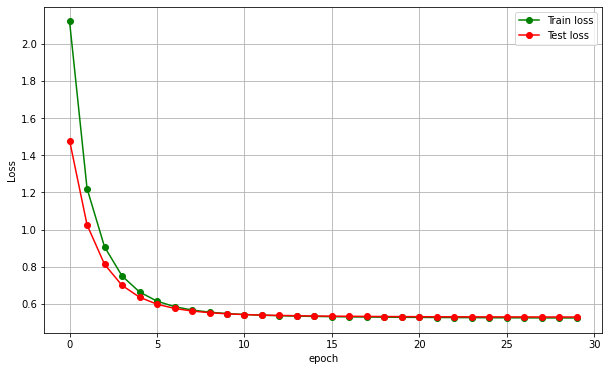

In [148]:
model = MLPRegression()
train_test(model, torch.optim.Adagrad(model.parameters(), lr=0.03), nn.MSELoss())

Epoch [1]. train_loss: 32338.95618247986. test_loss: 5120.705747842789
Epoch [2]. train_loss: 17048.226877212524. test_loss: 4118.609411239624
Epoch [3]. train_loss: 13089.444309473038. test_loss: 3209.0976860523224
Epoch [4]. train_loss: 10729.883541584015. test_loss: 2942.1433057785034
Epoch [5]. train_loss: 9328.10760307312. test_loss: 2787.338881969452
Epoch [6]. train_loss: 8531.090282917023. test_loss: 2739.2519001960754
Epoch [7]. train_loss: 8302.338067531586. test_loss: 2743.24503326416
Epoch [8]. train_loss: 8196.58703994751. test_loss: 2797.623408317566
Epoch [9]. train_loss: 8258.481037139893. test_loss: 2806.1512603759766
Epoch [10]. train_loss: 8272.264724254608. test_loss: 2827.438847541809
Epoch [11]. train_loss: 8233.178307056427. test_loss: 2839.725091457367
Epoch [12]. train_loss: 8341.644271373749. test_loss: 2764.1813917160034
Epoch [13]. train_loss: 8200.247324466705. test_loss: 2701.611894607544
Epoch [14]. train_loss: 8218.728158950806. test_loss: 2818.800514698

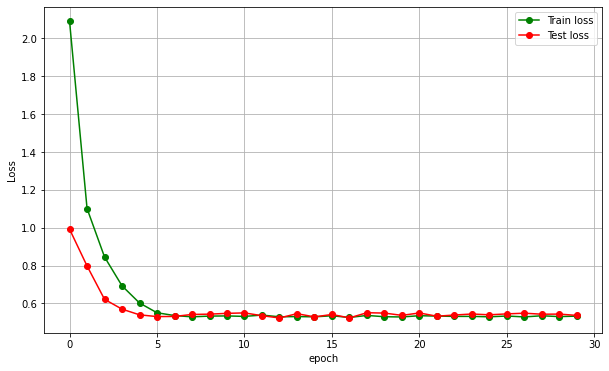

In [154]:
model = MLPRegression()
train_test(model, torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99), nn.MSELoss())

# Домашнее задание

Будем практиковаться на датасете недвижимости (sklearn.datasets.fetch_california_housing)

Ваша задача:
1. Создать Dataset для загрузки данных
2. Обернуть его в Dataloader
3. Написать архитектуру сети, которая предсказывает стоимость недвижимости. Сеть должна включать BatchNorm слои и Dropout (или НЕ включать, но нужно обосновать)
4. Сравните сходимость Adam, RMSProp и SGD, сделайте вывод по качеству работы модели

train-test разделение нужно сделать с помощью sklearn random_state=13, test_size = 0.25